In [2]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC

In [5]:
def diffyqs(X, t, omega0_2):
    xdot,x = X
    dx = xdot
    dv = -omega0_2*x
    return [dv, dx]

def analytic_sol_noisy(t,omega0,initial_condition,noise_sigma):
    v0,x0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t) +  noise_sigma * np.random.randn(len(t))

def analytic_sol(t,omega0,initial_condition):
    v0,x0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

def log_likelihood(theta):
    omega0 = theta
    if omega0 == 0.0:
        omega0 = 0.01
    else:
        pass
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

def log_likelihood(theta):
    omega0 = theta
    if omega0 == 0.0:
        omega0 = 0.01
    else:
        pass
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

1.0 1.0


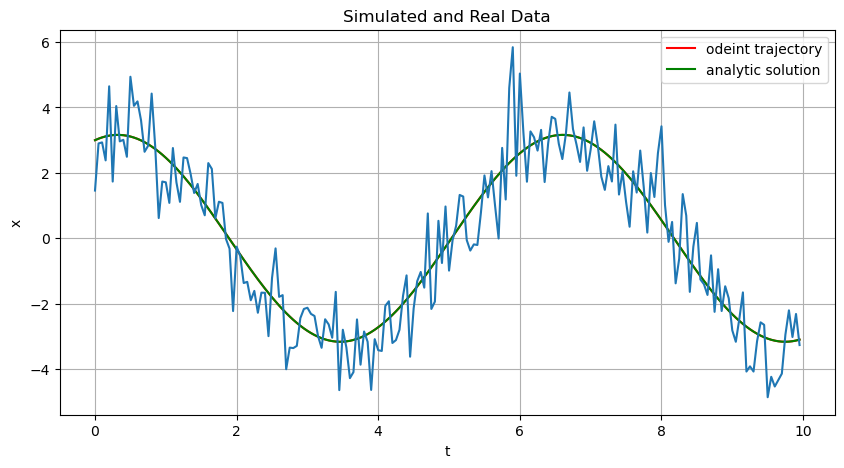

In [6]:
initial_condition = [1, 3]

k = 1
m = 1
omega0 = np.sqrt(k/m)
omega0_2 = k/m
print(omega0,omega0_2)
t = np.arange(0,10,0.05)
sigma = 0.1
sol_numerical = odeint(diffyqs, initial_condition, t, args=(omega0_2,)) # pass odeint the differential equation, initial condition, time array, and parameters
sol_analytic = analytic_sol(t,omega0,initial_condition)
#sol_analytic_fancy = analytic_sol_fancy(t,omega0,initial_condition)
sol_analytic_noisy = analytic_sol_noisy(t,omega0,initial_condition,1.0)
x_true = sol_analytic
# plot plot plot
plt.figure(figsize=(10,5))
plt.plot(t,sol_numerical[:,1], label = 'odeint trajectory',c = 'r') # to get the right part of the solution you have to do this weird transpose index thing
plt.plot(t,sol_analytic, label = "analytic solution", c = 'g')
#plt.plot(t,sol_analytic_fancy, label = "analytic solution", c = 'b')
plt.plot(t,sol_analytic_noisy)
plt.title('Simulated and Real Data')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()

In [28]:
sigma = 0.1
noise_sigma = 0.1

D = 1  

LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 100.0)  # Upper bounds

PLB = np.copy(LB)
PUB = np.copy(UB) 
PUB[0][0] =  10.0
PLB[0][0] = 0.1

x0 = 1.2 * np.ones((1, D))

options = {
    #"max_fun_evals": 100,
    "display": "iter"
}

print(options)
print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

{'display': 'iter'}
LB: [[0.]] PLB: [[0.1]] PUB: [[10.]] UB: [[100.]] x0: [[1.2]]


In [30]:
noises = np.array([0.0,0.1,0.5,1.0])
count = 0
for noise_sigma in noises:
    x_true = analytic_sol_noisy(t,omega0,initial_condition,noise_sigma = noise_sigma)

    vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = SplineTrapezoidal(LB, PLB, PUB, UB), options = options)

    vp, results = vbmc.optimize();
    vp.save("noise_" + str(count) + ".hdf5")
    count += 1

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10       -8891.93      8970.21   7758838.20        2        inf     start warm-up
     1         15         266.12         0.00       283.73        2        inf     
     2         20         266.12         0.00         0.02        2      0.729     
     3         25         266.15         0.00         0.00        2      0.113     
     4         30         266.14         0.00         0.00        2      0.112     
     5         35         266.12         0.00         0.00        2     0.0809     
     6         40         266.15         0.00         0.00        2      0.146     end warm-up
     7         45         266.14         0.00         0.00        2     0.0429     
     8         50         266.12         0.00         0.00        2      0.179     
     9         55         266.13         0.00         0.00        5     0.0427     
    10         60         266.13         0.00         0.03        8      0.874     
    11         65         266.12         0.00       

c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 0. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     2         20         163.92         0.00         0.01        2      0.295     
     3         25         163.94         0.00         0.01        2      0.464     
     4         30         163.94         0.00         0.00        2     0.0716     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 2. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     5         35         163.95         0.00         0.00        2     0.0756     
     6         40         163.94         0.00         0.01        2      0.401     end warm-up


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 1. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 5. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 6. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     7         45         163.93         0.00         0.03        2      0.955     
     8         50         163.84         0.00         0.15        2       5.27     
     9         55         163.88         0.00         0.00        3      0.182     
    10         60         163.92         0.00         0.16        6       5.48     
    11         65         163.92         0.00         0.07        7       2.18     
    12         70         163.91         0.00         0.06        7       1.88     
    13         75         163.87         0.00         0.13        7        4.3     
    14         80         163.91         0.00         0.02        7       0.69     
    15         85         163.90         0.00         0.00        7      0.138     
    16         90         163.88         0.00         0.15        7       5.18     
    17         95         163.86         0.00         0.26        7       8.83     
    18        100         163.93         0.00         0.13        7       4.

c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 4. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 3. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 7. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     6         40       -7875.05         0.01         0.01        2      0.403     
     7         45       -7875.06         0.00         0.00        2      0.184     end warm-up
     8         50       -7875.43         0.00         0.41        2         15     
     9         55       -7875.38         0.00         0.01        2      0.351     
    10         60       -7875.14         0.00         0.45        5       15.7     
    11         65       -7875.10         0.00         0.01        6       0.36     
    12         70       -7875.04         0.00         0.03        9       1.05     
    13         75       -7875.05         0.00         0.00       10      0.168     
    14         80       -7875.54         0.00         0.44       10       16.4     
    15         85       -7875.14         0.00         0.15       10       6.46     
    16         90       -7875.05         0.00         0.12       10       4.13     
    17         95       -7875.06         0.00         0.00       

In [31]:
from pyvbmc import VariationalPosterior
vps = []
count = 0
for noise_sigma in noises:
    vp = VariationalPosterior.load("noise_" + str(count) + ".hdf5")
    vps.append(vp)
    count += 1

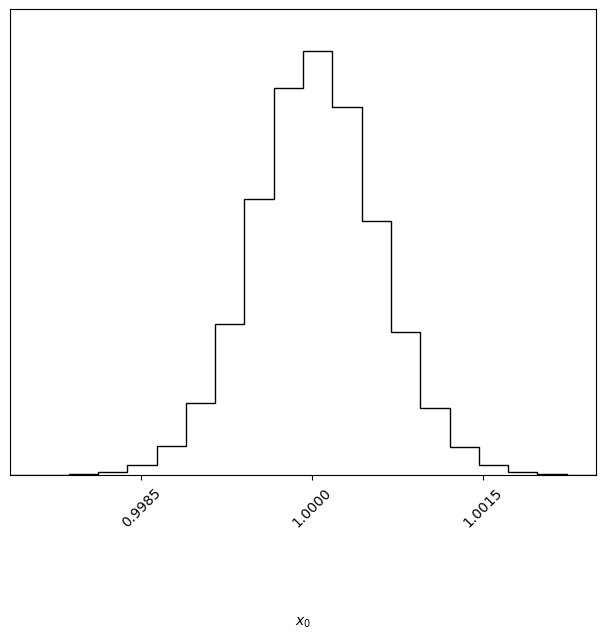

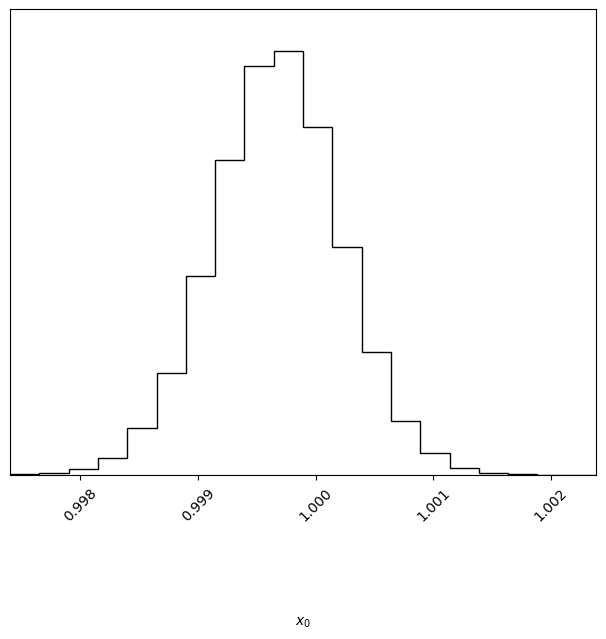

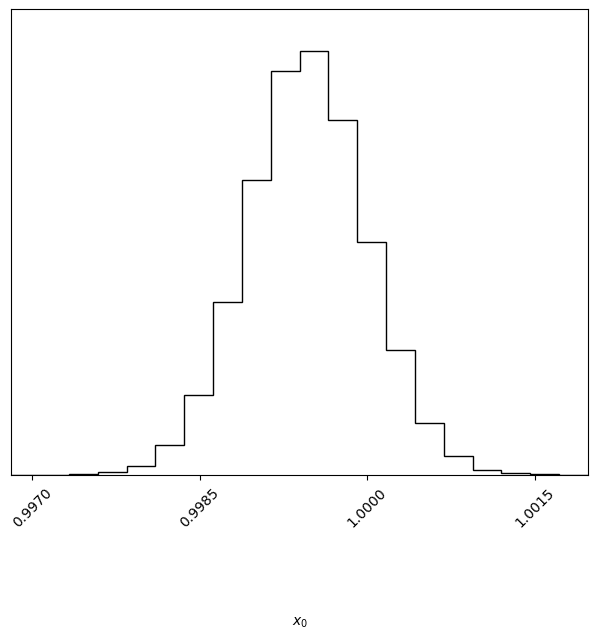

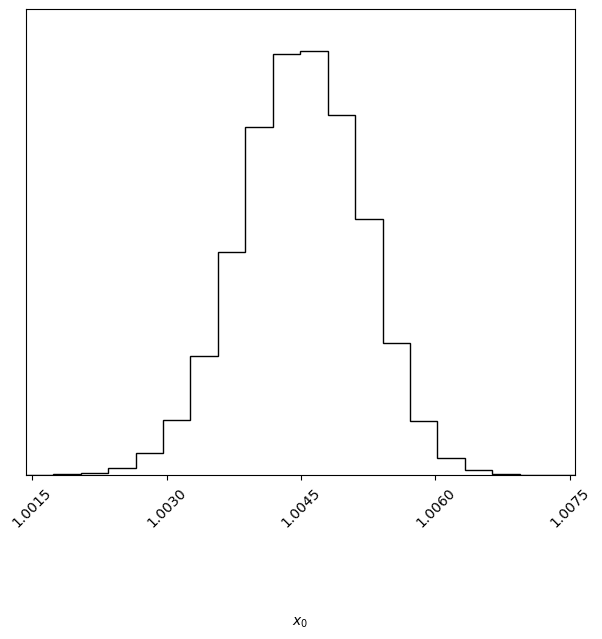

In [32]:
for vp in vps:
    vp.plot();

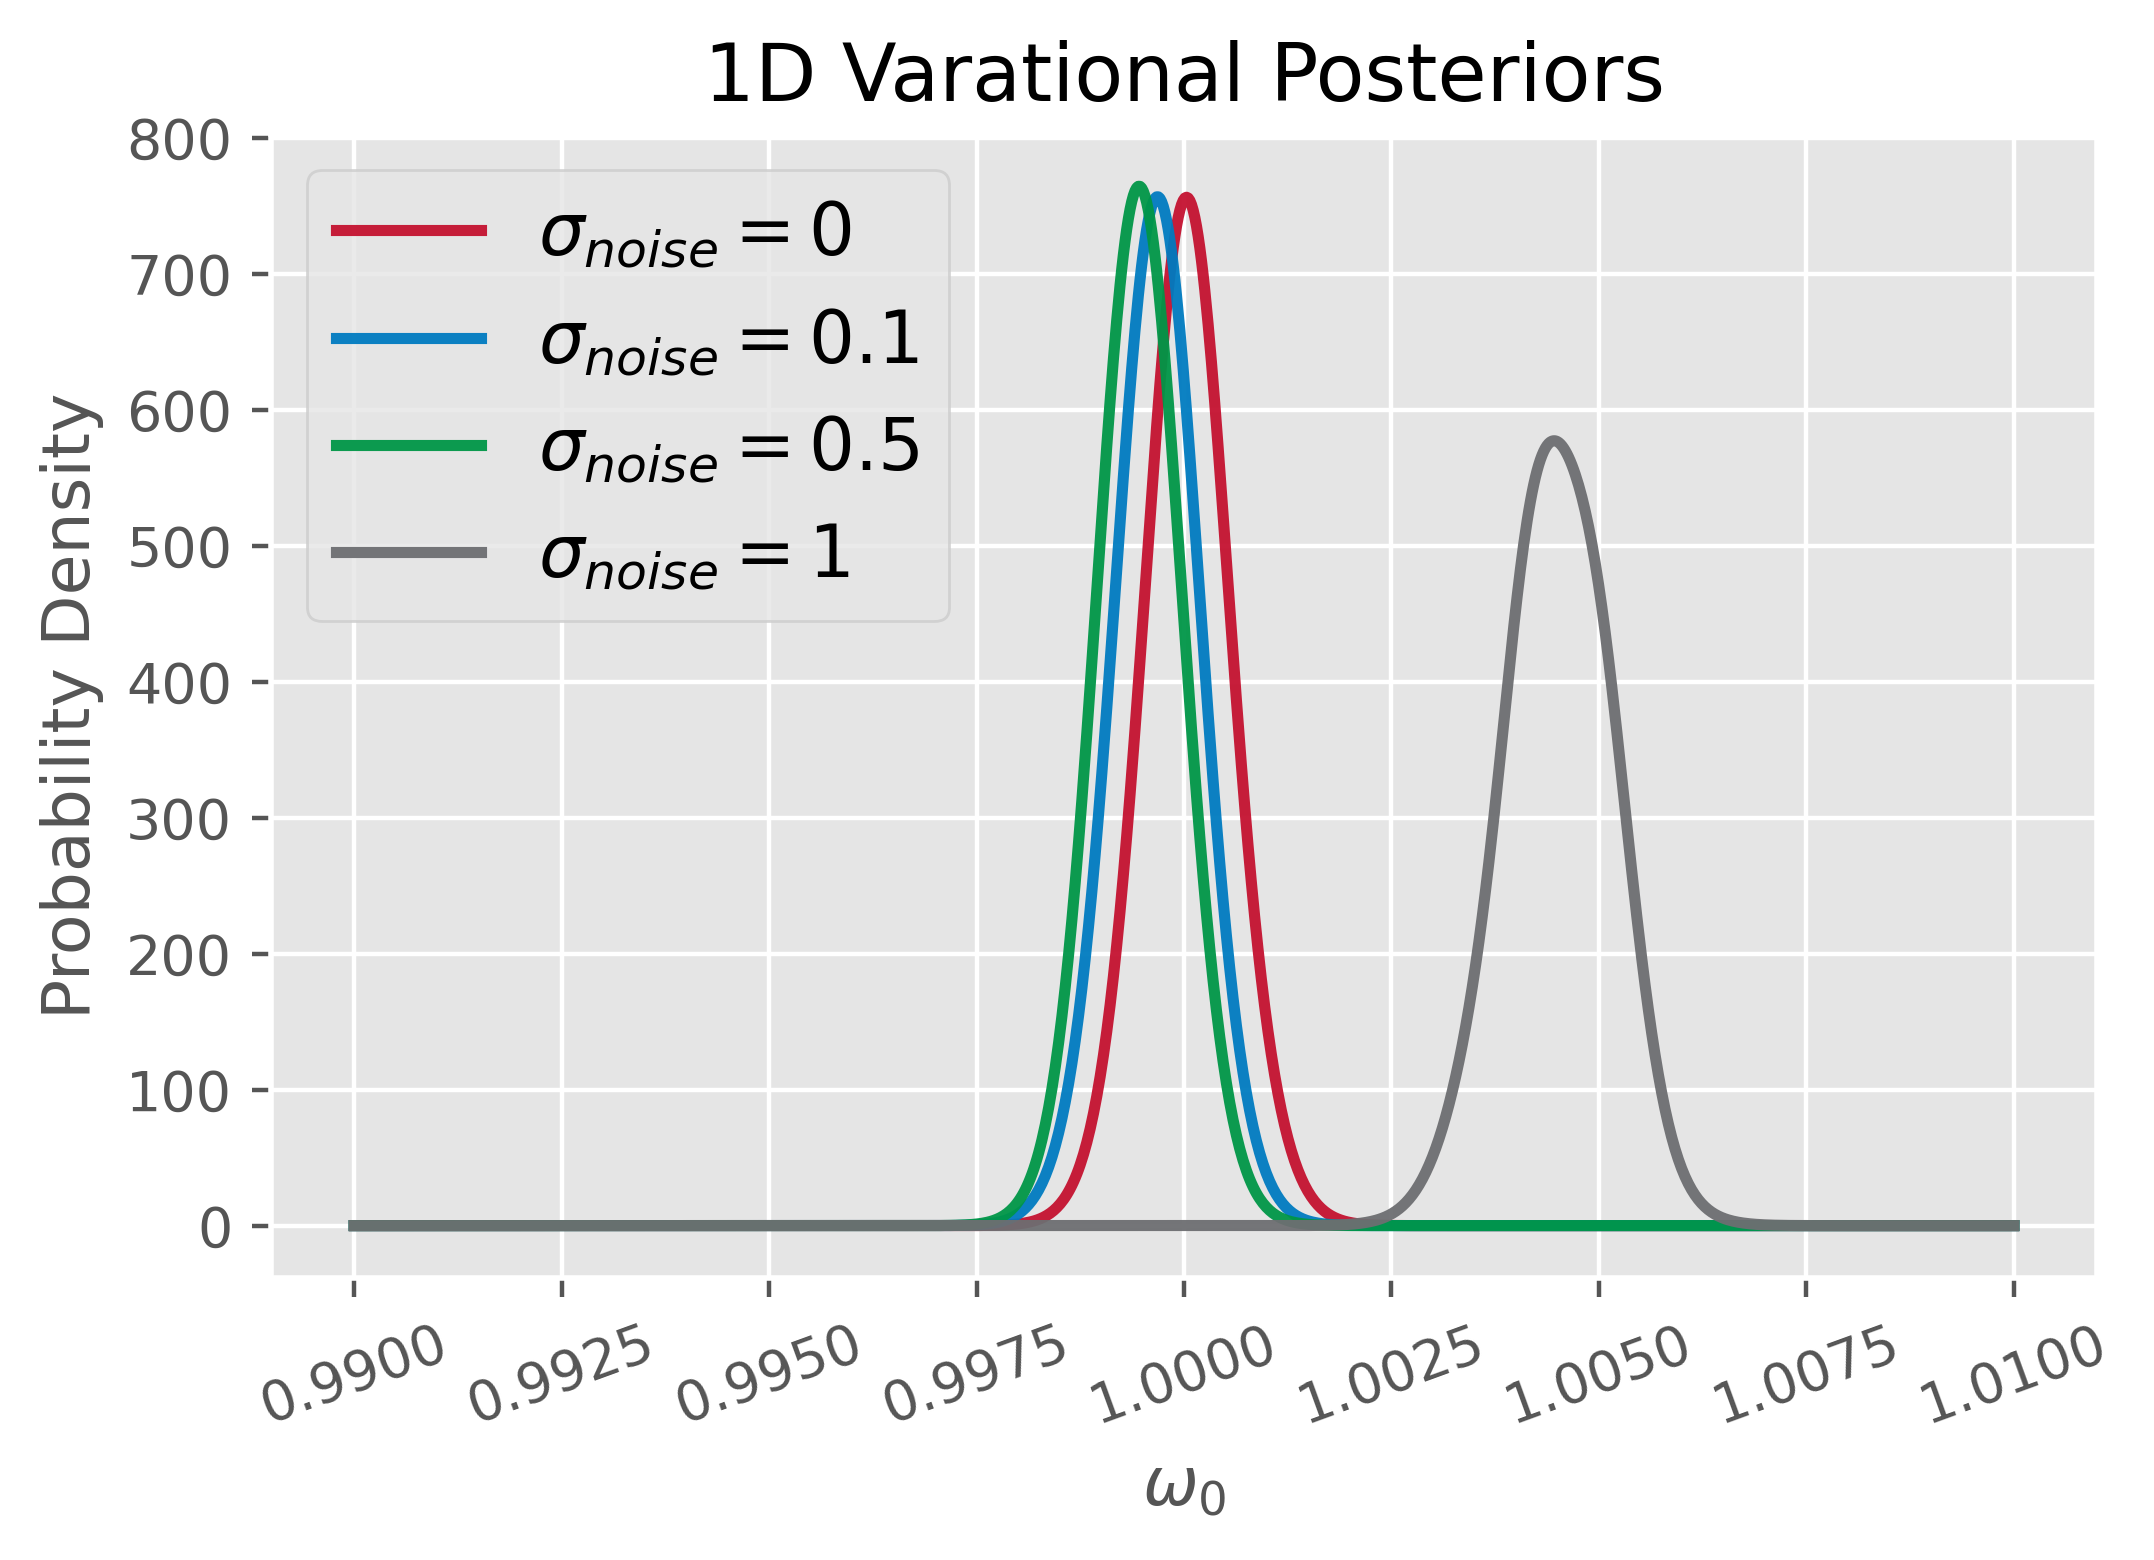

In [80]:
plt.style.use("ggplot")
# use red first, then blue then green for single plots
red = "#C41230"
blue  = "#007BC0"
green = "#009647"
gold = "#FDB515"
gray = "#6D6E71"
teal = "#008F91"


dx = 0.01
x = np.linspace(1. - dx,1. + dx,1000)


PDF0 = vps[0].pdf(x.reshape((-1,1)))
PDF1 = vps[1].pdf(x.reshape((-1,1)))
PDF2 = vps[2].pdf(x.reshape((-1,1)))
PDF3 = vps[3].pdf(x.reshape((-1,1)))

fig = plt.figure(figsize = (5.5,4),dpi = 400)
plt.plot(x,PDF0,c = red,lw = 2, label = r"$\sigma_{noise} = 0$", alpha = 0.95)
plt.plot(x,PDF1, c = blue,lw = 2,label = r"$\sigma_{noise} = 0.1$", alpha = 0.95)
plt.plot(x,PDF2,c = green,lw = 2,label = r"$\sigma_{noise} = 0.5$", alpha = 0.95)
plt.plot(x,PDF3,c = gray,lw = 2,label = r"$\sigma_{noise} = 1$", alpha = 0.95)
plt.legend(loc = "upper left",fontsize = 13)
plt.ylabel("Probability Density")
plt.xlabel(r"$\omega_0$")
plt.xticks(rotation = 20)
plt.title("1D Varational Posteriors")
#plt.yticks([])
plt.tight_layout()
plt.show()

dont't need likelihood, not releant to what we want to communicate, same thing for number of evaluations. Stepping up examples as a narrative where each adds a complication, new interesting thing that fits with what we are trying to communicate.